In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
from tensorflow.keras.models import Sequential
data=pd.read_csv("/content/drive/MyDrive/summer internship-cps/a34.csv")

In [ ]:
X=data.drop('output',axis=1)
y=data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((219, 21), (219,), (25, 21), (25,))

In [ ]:
# Convert DataFrame to NumPy array
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
X_train.shape[1]

21

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from keras.layers import Dropout
model = Sequential()
model.add(Conv1D(filters=400, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Conv1D(filters=128, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=3))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()


Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_117 (Conv1D)         (None, 19, 400)           1600      
                                                                 
 conv1d_118 (Conv1D)         (None, 17, 128)           153728    
                                                                 
 conv1d_119 (Conv1D)         (None, 15, 64)            24640     
                                                                 
 conv1d_120 (Conv1D)         (None, 13, 32)            6176      
                                                                 
 max_pooling1d_26 (MaxPoolin  (None, 4, 32)            0         
 g1D)                                                            
                                                                 
 flatten_24 (Flatten)        (None, 128)               0         
                                                     

In [ ]:

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"],)


model_history = model.fit(X_train,y_train, epochs=216, validation_data=(X_test,y_test),batch_size=64)

Epoch 1/216
4/4 [==============================] - 2s 143ms/step - loss: 0.6915 - accuracy: 0.4932 - val_loss: 0.6862 - val_accuracy: 0.4400
Epoch 2/216
4/4 [==============================] - 0s 72ms/step - loss: 0.6778 - accuracy: 0.4932 - val_loss: 0.6770 - val_accuracy: 0.4400
Epoch 3/216
4/4 [==============================] - 0s 98ms/step - loss: 0.6490 - accuracy: 0.4886 - val_loss: 0.6419 - val_accuracy: 0.5200
Epoch 4/216
4/4 [==============================] - 0s 108ms/step - loss: 0.6027 - accuracy: 0.6347 - val_loss: 0.5805 - val_accuracy: 0.7200
Epoch 5/216
4/4 [==============================] - 0s 99ms/step - loss: 0.5298 - accuracy: 0.7900 - val_loss: 0.5033 - val_accuracy: 0.8000
Epoch 6/216
4/4 [==============================] - 0s 97ms/step - loss: 0.4580 - accuracy: 0.7808 - val_loss: 0.4555 - val_accuracy: 0.7600
Epoch 7/216
4/4 [==============================] - 0s 101ms/step - loss: 0.4201 - accuracy: 0.7808 - val_loss: 0.4445 - val_accuracy: 0.7600
Epoch 8/216
4/4 [

In [ ]:
predictions = model.predict(X_test)

# Convert predictions to class labels
predicted_labels = np.round(predictions).astype(int)

# Print the predicted labels
print(predicted_labels)

1/1 [==============================] - 0s 128ms/step
[[0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]]


In [ ]:
print(np.array(y_test))

[0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 1.]


In [ ]:
train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

1/1 [==============================] - 0s 31ms/step - loss: 0.1678 - accuracy: 0.9600
Train accuracy 89.04 %
Train loss 0.21690617501735687
Test accuracy 96.0 %
Test loss 0.16776588559150696


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,predicted_labels))
print('*'*50)
print(confusion_matrix(y_test,predicted_labels))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97        14
         1.0       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

**************************************************
[[14  0]
 [ 1 10]]


In [ ]:
label_map = {
    0: 'Autism child',
    1: 'typical child'
}

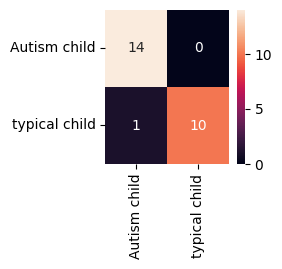

In [ ]:
plt.figure(figsize=(2,2))
conf_matrix = confusion_matrix(y_test,predicted_labels)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()

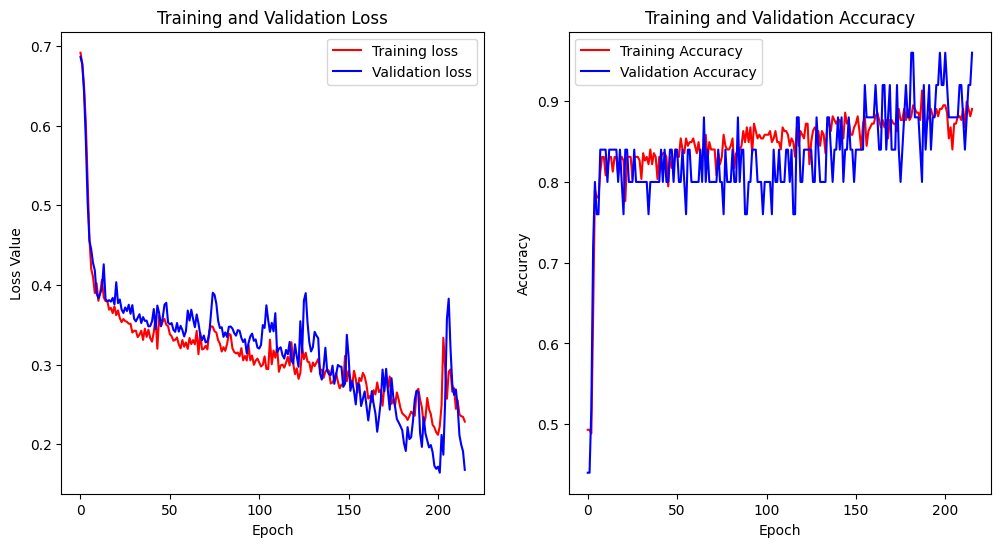

In [ ]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['accuracy']
val_accuracy = model_history.history['val_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()